# TP 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
from sklearn.decomposition import PCA
from numpy import linalg as LA

# Part1:

In [3]:
f = open ( 'datamat2.txt' , 'r')
X= np.loadtxt("datamat2.txt", delimiter=';')

In [4]:
X

array([[ 6. ,  6. ,  5. ,  5.5],
       [ 8. ,  8. ,  8. ,  8. ],
       [ 6. ,  7. , 11. ,  9.5],
       [14.5, 15.5, 15.5, 15. ],
       [14. , 14. , 12. , 12.5],
       [11. , 10. ,  5.5,  7. ],
       [ 5.5,  7. , 14. , 11.5],
       [13. , 12.5,  8.5,  9.5],
       [ 9. ,  9.5, 12.5, 12. ]])

In [5]:
# It's a function that returns the eigenvectors (V), eigenvalues and mean vector of a dataset X.
#Eigenvalues and respective eigenvectors will be sorted in decreasing order.
#meanvect is a vector that contains the mean for each variable.
def mypca(X):
    meanvect=np.mean(X,axis=0)
    Xc=X-meanvect
    sigma=(1/Xc.shape[0])*(Xc.T@Xc)

    lamb, V=np.linalg.eig(sigma)
    
    idx = lamb.argsort()[::-1]   
    lamb = lamb[idx]
    V = V[:,idx]

    
    return lamb, V, meanvect

In [6]:
lamb, V, meanvect=mypca(X)

In [7]:
lamb

array([2.94068813e+01, 1.19860962e+01, 4.09537482e-02, 1.05132178e-02])

In [8]:
TotalValP=sum(lamb)
TotalValP

41.44444444444445

In [9]:
#cette fonction calcul le ratio de chaque valeur propre par rapport à l'ensemle des valeurs propres
def variance_ratio(lamb):
    TotalValP=sum(lamb)
    return lamb/TotalValP

In [10]:
variance_ratio(lamb)

array([7.09549414e-01, 2.89208756e-01, 9.88160144e-04, 2.53670135e-04])

# les deux composantes contiennent 99,87% de l'information. La première composante contient 70,95% de variance tandis que la deuxième composante contient 28,92%

In [11]:
V

array([[ 0.50933446,  0.55954974,  0.30420039,  0.578744  ],
       [ 0.53890012,  0.3566744 , -0.54804997, -0.53104733],
       [ 0.4770486 , -0.66882212, -0.3789763 ,  0.42600302],
       [ 0.47179413, -0.33520804,  0.68079389, -0.44896052]])

In [12]:
V[:,:2]

array([[ 0.50933446,  0.55954974],
       [ 0.53890012,  0.3566744 ],
       [ 0.4770486 , -0.66882212],
       [ 0.47179413, -0.33520804]])

In [13]:
meanvect

array([ 9.66666667,  9.94444444, 10.22222222, 10.05555556])

In [14]:
# this function allow to project a data matrix X onto the eigenvectors stored in P.
def pcaproj(X, meanvect, P):
    Xc=X-meanvect
    CI=Xc@P
    return CI

In [15]:
C = pcaproj(X, meanvect, V) 
print(C)
print(C.shape)

[[-8.63375944e+00  1.56123188e+00 -7.59447024e-02 -2.06792498e-01]
 [-3.92665916e+00  5.49193682e-01  1.41196259e-03  4.42086065e-02]
 [-3.34539121e+00 -3.43585862e+00 -1.74676903e-01  2.23362164e-02]
 [ 1.03061891e+01 -5.01297226e-01 -2.08425301e-01 -1.24511345e-01]
 [ 6.39401632e+00  1.86281384e+00  8.59817800e-02  1.40783773e-02]
 [-2.98527115e+00  4.94845505e+00  8.45600417e-02  1.02298918e-01]
 [-1.22532439e+00 -6.39251594e+00 -1.02118212e-01  1.13052239e-01]
 [ 1.99127919e+00  4.11475405e+00 -1.12108278e-01  8.77763568e-02]
 [ 1.42492070e+00 -2.70677670e+00  5.01319612e-01 -5.24468708e-02]]
(9, 4)


In [16]:
# This function compute the reconstruction of X knowing its principal components ci containing in C and the eigenvectors containing in P
def reconstructpca(C, P, meanvect):
    Xhat=meanvect+C@P.T
    return Xhat
    

In [17]:
Xhat = reconstructpca(C, V, meanvect) 
print(Xhat)
print(Xhat.shape)

[[ 6.   6.   5.   5.5]
 [ 8.   8.   8.   8. ]
 [ 6.   7.  11.   9.5]
 [14.5 15.5 15.5 15. ]
 [14.  14.  12.  12.5]
 [11.  10.   5.5  7. ]
 [ 5.5  7.  14.  11.5]
 [13.  12.5  8.5  9.5]
 [ 9.   9.5 12.5 12. ]]
(9, 4)


In [18]:
Xhat-X

array([[-4.44089210e-15,  9.76996262e-15,  1.77635684e-15,
        -6.21724894e-15],
       [ 1.77635684e-15, -1.77635684e-15, -1.77635684e-15,
         1.77635684e-15],
       [-3.55271368e-15,  5.32907052e-15, -3.55271368e-15,
         5.32907052e-15],
       [-1.42108547e-14,  1.06581410e-14,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00, -3.55271368e-15,  1.77635684e-15,
        -1.77635684e-15],
       [ 5.32907052e-15, -7.10542736e-15, -2.66453526e-15,
         3.55271368e-15],
       [ 1.77635684e-15,  0.00000000e+00, -3.55271368e-15,
         7.10542736e-15],
       [-5.32907052e-15,  0.00000000e+00, -7.10542736e-15,
         8.88178420e-15],
       [ 1.95399252e-14, -1.59872116e-14,  1.59872116e-14,
        -1.77635684e-14]])

## La matrice Xhat obtenue suite à la reconstruction pca en se basant sur toutes les composantes est presque égal à la matrice initiale

# ci-aprés la matrice XhatR obtenue suite à la reconstruction pca en se basant sur les deux plus grandes valeurs propres

In [19]:
VR=V[:,:2]
CR=C[:,:2]
print(VR.shape)
print(CR.shape)
XhatR = reconstructpca(CR, VR, meanvect) 
print(XhatR)
print(XhatR.shape)

(4, 2)
(9, 2)
[[ 6.14278233  5.8485619   5.05931299  5.45886102]
 [ 7.97398501  8.02425069  7.9817021   8.01888666]
 [ 6.04020983  6.91612992 10.9242863   9.62894705]
 [14.63546325 15.3196511  15.47405396 15.08599399]
 [13.96569653 14.0545986  12.02658763 12.44778477]
 [10.91507192 10.1006687   5.4884666   6.98836022]
 [ 5.46563609  7.00407021 13.91313902 11.62027745]
 [12.98330334 12.48517246  8.42012063  9.61573075]
 [ 8.87785169  9.74689643 12.71233078 11.6351581 ]]
(9, 4)


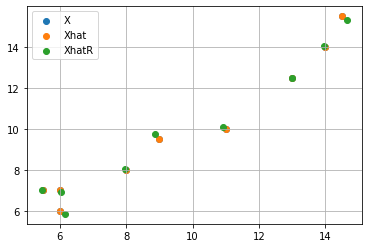

In [20]:
plt.scatter(X[:,0], X[:,1], label="X")
plt.scatter(Xhat[:,0], Xhat[:,1], label="Xhat")
plt.scatter(XhatR[:,0], XhatR[:,1], label="XhatR")
plt.grid(True)
plt.legend()
plt.show()


## La représentation de X ( données initiales) et Xhat (la matrice reconstruite avec d=4) et XhatR (la matrice reconstruite avec d=2), nous montre que la différence entre XhatR et X n'est pas aussi importante. 

In [21]:
loss = np.sum((X - XhatR) ** 2, axis=1).mean()
loss

0.05146696602755967

## L'erreur obtenue suite à la reconstruction avec d=2 est de l'ordre de 0.05

## PCA skitlearn

In [22]:
pca = PCA(n_components=2)
pca.fit(X)
PCA(n_components=2)
print(pca.explained_variance_ratio_)
print(pca.components_)
print(pca.singular_values_)


[0.70954941 0.28920876]
[[ 0.50933446  0.53890012  0.4770486   0.47179413]
 [-0.55954974 -0.3566744   0.66882212  0.33520804]]
[16.26843359 10.38628258]


# les deux composantes contiennent 99,87% de l'information. La première composante contient 70,95% de variance tandis que la deuxième composante contient 28,92%

In [23]:
Cpca = pca.transform(X)
print(Cpca)

[[-8.63375944 -1.56123188]
 [-3.92665916 -0.54919368]
 [-3.34539121  3.43585862]
 [10.30618914  0.50129723]
 [ 6.39401632 -1.86281384]
 [-2.98527115 -4.94845505]
 [-1.22532439  6.39251594]
 [ 1.99127919 -4.11475405]
 [ 1.4249207   2.7067767 ]]


In [24]:
Xath_pca = pca.fit_transform(X)
Xath_pca

array([[-8.63375944, -1.56123188],
       [-3.92665916, -0.54919368],
       [-3.34539121,  3.43585862],
       [10.30618914,  0.50129723],
       [ 6.39401632, -1.86281384],
       [-2.98527115, -4.94845505],
       [-1.22532439,  6.39251594],
       [ 1.99127919, -4.11475405],
       [ 1.4249207 ,  2.7067767 ]])

In [25]:
Xproj = pca.inverse_transform(Xath_pca)
Xproj

array([[ 6.14278233,  5.8485619 ,  5.05931299,  5.45886102],
       [ 7.97398501,  8.02425069,  7.9817021 ,  8.01888666],
       [ 6.04020983,  6.91612992, 10.9242863 ,  9.62894705],
       [14.63546325, 15.3196511 , 15.47405396, 15.08599399],
       [13.96569653, 14.0545986 , 12.02658763, 12.44778477],
       [10.91507192, 10.1006687 ,  5.4884666 ,  6.98836022],
       [ 5.46563609,  7.00407021, 13.91313902, 11.62027745],
       [12.98330334, 12.48517246,  8.42012063,  9.61573075],
       [ 8.87785169,  9.74689643, 12.71233078, 11.6351581 ]])

In [26]:
loss = np.sum((X - Xproj) ** 2, axis=1).mean()
loss

0.05146696602755988

# En final avec les fonctions de skitlearn, j'ai obtenu les mêmes résultats que les fonctions développées par mes soins

# Part2:

# J'ai choisi le chiffre 3

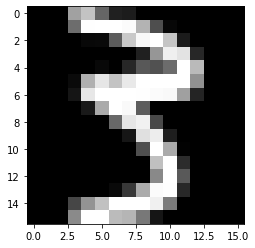

In [27]:
myusps = sio.loadmat('usps.mat') 
Xall=myusps['x']
y=myusps['y']
#just to see the first digit
firstdigit=np.reshape(Xall[15,:], (16, 16)) 
plt.imshow(firstdigit, cmap='gray')

# tip: use np.where to get the chosen digit!


In [75]:
firstdigit.shape

(16, 16)

In [33]:
Xall

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
lamba, Va, meanvecta=mypca(firstdigit)

In [77]:
lamba

array([ 2.43054052e+00,  1.26309328e+00,  5.61481245e-01,  2.80585793e-01,
        7.91027628e-02,  1.58743825e-02,  1.32367585e-02,  7.37011112e-03,
        2.29570264e-03,  7.77156744e-04,  5.13845515e-04,  2.36731303e-04,
        1.14917941e-04,  4.21845128e-05,  1.04313059e-05, -3.51777644e-18])

In [78]:
len(lamba)

16

In [80]:
variance_ratio(lamba)

array([ 5.22104514e-01,  2.71325122e-01,  1.20611811e-01,  6.02726463e-02,
        1.69920679e-02,  3.40997680e-03,  2.84338867e-03,  1.58317389e-03,
        4.93139984e-04,  1.66941074e-04,  1.10379177e-04,  5.08522615e-05,
        2.46855279e-05,  9.06165703e-06,  2.24074927e-06, -7.55653710e-19])

No handles with labels found to put in legend.


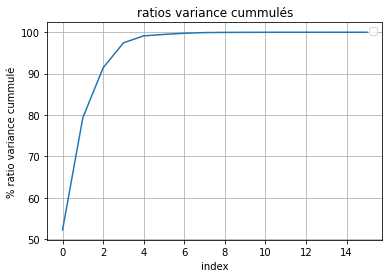

In [108]:
plt.plot(np.cumsum(variance_ratio(lamba)*100))
plt.grid(True)
plt.title('ratios variance cummulés')
plt.xlabel('index')
plt.ylabel('% ratio variance cummulé')
plt.legend()
plt.show()

In [82]:
cum_variance_ratio=np.cumsum(variance_ratio(lamba)*100)

In [94]:
cum_variance_ratio

array([ 52.21045138,  79.34296355,  91.4041446 ,  97.43140923,
        99.13061602,  99.4716137 ,  99.75595257,  99.91426996,
        99.96358396,  99.98027806,  99.99131598,  99.99640121,
        99.99886976,  99.99977593, 100.        , 100.        ])

In [83]:
np.where(cum_variance_ratio>=90)[0][0]

2

In [84]:
cum_variance_ratio[2]

91.40414460184735

# En analysant l'illustration en dessus des ratios de variation cumulés, nous pourrons dire que à partir du troisième eigen value on a 90%de variance.

No handles with labels found to put in legend.


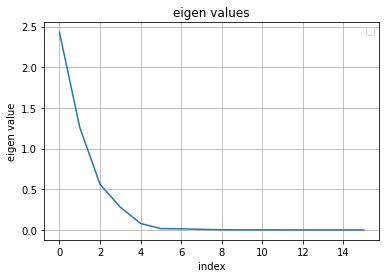

In [110]:
plt.plot(lamba)
plt.grid(True)
plt.title('eigen values')
plt.xlabel('index')
plt.ylabel('eigen value')
plt.legend()
plt.show()

In [86]:
Va

array([[-2.35874787e-02,  1.28575979e-02,  3.18431976e-02,
        -4.24751899e-02,  2.41396575e-02, -3.14724762e-01,
         2.59298027e-02, -8.99744746e-02, -6.36469961e-02,
        -1.22259064e-01, -3.77202886e-02,  7.01011065e-01,
         3.00334662e-01,  5.28184398e-01,  8.16283252e-02,
         1.94324225e-02],
       [-6.61089892e-02,  3.53329731e-02,  4.79428913e-02,
         2.95876578e-02, -2.38475351e-02, -6.67687474e-01,
        -2.94520534e-01, -1.22464016e-01,  7.43674722e-02,
        -3.19974755e-01, -1.35068019e-01, -2.75323328e-01,
         1.83010588e-01, -2.49402849e-01,  2.52548335e-01,
        -2.85755484e-01],
       [-5.94397581e-02,  8.78527107e-02,  5.15118795e-02,
         2.86551089e-01, -2.80613937e-01, -4.12551151e-01,
        -3.51902918e-01,  1.05697273e-01,  3.56963838e-02,
         3.31519234e-01,  1.71137331e-01,  5.31227834e-02,
        -2.42812364e-01,  5.03666459e-02, -5.18132453e-01,
         2.16306431e-01],
       [-1.52074067e-01,  5.71696723e

In [87]:
meanvecta

array([ 0.01168409,  0.02420785,  0.1005483 ,  0.29796991,  0.47666608,
        0.71144237,  0.84779912,  0.99171688,  1.06043665,  1.20013901,
        1.03709016,  0.56132023,  0.15654288, -0.02161231, -0.0267786 ,
        0.00384093])

In [88]:
Ca = pcaproj(firstdigit, meanvecta, Va) 
print(Ca)
print(Ca.shape)

[[-4.80484735e-01  2.19012078e+00 -1.56225969e+00  3.53949531e-01
  -1.32203117e-01 -1.49634751e-01  9.83658221e-02 -3.82498363e-02
   3.96796835e-02  4.68324789e-03 -1.93002936e-02 -1.75275846e-02
   1.03556031e-03  4.79032713e-04  3.23257994e-03 -2.52698823e-15]
 [-1.87726974e+00  3.95086700e-01  2.93518694e-01  5.07828465e-01
  -4.91910706e-01  8.48750090e-02 -3.33054480e-02 -1.90387235e-01
   2.88877748e-02 -5.56238141e-03  1.97139584e-02  2.14023917e-02
  -4.14696373e-03 -1.68674968e-03 -2.34568723e-03  1.99257596e-15]
 [-3.45340974e-01 -7.23067276e-01  8.68540893e-01 -1.37532298e-01
  -2.11949899e-01  1.77094112e-01 -1.60689555e-01  2.16560071e-03
   6.19459099e-02  1.06600350e-02 -1.43748221e-02 -3.06193435e-02
   9.64780490e-03 -7.95909262e-04  4.11832349e-03 -3.37143340e-15]
 [ 2.06590012e+00 -7.34869935e-02 -5.50798194e-01 -7.10068095e-01
  -2.98807435e-01  1.39352304e-02 -1.09874090e-01 -5.72607930e-02
  -6.94832806e-02  2.28502083e-02 -1.17286835e-02 -1.31653012e-02
  -1.52

In [89]:
Xhata = reconstructpca(Ca, Va, meanvecta) 
print(Xhata)
print(Xhata.shape)

[[ 2.24611504e-02  1.57475807e-01  3.99470503e-01  8.17202157e-01
   1.20452327e+00  1.21200266e+00  8.77530045e-01  3.75135960e-01
  -2.55496047e-01 -3.60783976e-01 -1.24391338e-01 -1.48104990e-01
  -1.26974755e-01 -1.22554814e-02  6.00870390e-02  4.91504507e-03]
 [ 3.72733076e-02  1.73997200e-01  5.07934540e-01  1.09394569e+00
   1.27019647e+00  1.35705562e+00  1.55228123e+00  1.86770948e+00
   1.67297636e+00  1.04155850e+00  4.64778091e-01 -1.11316411e-02
  -1.74673998e-01 -1.36035854e-01  9.29181531e-03  1.16675034e-02]
 [-4.45369396e-02  7.50494727e-03  1.03215810e-01  3.22086431e-01
   3.40627892e-01  5.33318909e-01  9.86433165e-01  1.67120421e+00
   1.86021172e+00  1.70233576e+00  1.33218791e+00  6.40944454e-01
   1.82908042e-01 -9.32659800e-03 -1.33542925e-02  3.85653302e-02]
 [-4.31759043e-02 -1.37932665e-01 -1.41332165e-01 -4.06801088e-02
  -1.53078460e-01 -3.59346381e-01 -2.46521336e-01  7.72012314e-02
   4.72539807e-01  8.86895087e-01  1.35105757e+00  1.29722943e+00
   7.08

In [91]:
Xhata-firstdigit

array([[-6.52256027e-16,  3.33066907e-15, -4.49640325e-15,
         4.55191440e-15, -4.21884749e-15, -1.11022302e-15,
         2.22044605e-16,  2.22044605e-15, -1.66533454e-15,
        -1.77635684e-15,  2.44249065e-15, -6.10622664e-16,
        -4.99600361e-16, -2.12677098e-15, -1.64451786e-15,
        -6.94930224e-15],
       [ 8.95117314e-16, -3.10862447e-15,  1.22124533e-15,
        -3.55271368e-15,  5.77315973e-15, -4.44089210e-15,
         2.22044605e-15, -1.55431223e-15, -2.22044605e-16,
         2.88657986e-15, -1.27675648e-15,  3.33066907e-16,
        -1.66533454e-16,  1.74860126e-15,  1.12410081e-15,
         6.22592256e-15],
       [-5.00988140e-15,  6.90072999e-15, -3.38618023e-15,
         5.44009282e-15, -8.04911693e-15,  8.21565038e-15,
        -2.22044605e-15, -2.66453526e-15,  1.55431223e-15,
         2.44249065e-15, -2.66453526e-15, -1.44328993e-15,
         3.94129174e-15,  2.18575158e-16,  1.70002901e-16,
        -4.85028684e-15],
       [ 6.31439345e-15,  9.43689571e

# Etant donné que le nombre de eigen values à retenir est 3, donc on va appliquer la reconstruction pca sur la base des 3 eigen vectors

In [101]:
VRa=Va[:,:3]
CRa=Ca[:,:3]
print(VRa.shape)
print(CRa.shape)
XhatRa = reconstructpca(CRa, VRa, meanvecta) 
print(XhatRa)
print(XhatRa.shape)

(16, 3)
(16, 3)
[[ 1.42986312e-03  5.84564372e-02  2.41041308e-01  6.37465636e-01
   1.05338529e+00  1.11308289e+00  9.56388287e-01  5.40211912e-01
  -2.73814725e-01 -5.16203568e-01 -1.68856261e-01 -6.82953530e-02
  -5.36515508e-02 -4.70563048e-02 -1.01627187e-02 -1.66865192e-02]
 [ 7.03905910e-02  1.76343972e-01  2.61961893e-01  5.79508780e-01
   9.60391829e-01  1.41222998e+00  1.79942453e+00  1.94458361e+00
   1.55966388e+00  9.53490115e-01  3.47724694e-01  6.07858666e-02
  -6.63704010e-02 -1.02410469e-01  1.26826509e-02  5.11641213e-02]
 [ 3.81900253e-02  6.31302329e-02  1.02292035e-01  2.30639433e-01
   3.27803761e-01  6.94680208e-01  1.06996802e+00  1.48561702e+00
   1.80641034e+00  1.87256822e+00  1.28715493e+00  5.87050261e-01
   1.29507394e-01 -3.43169385e-02 -1.00586202e-02  3.47371613e-02]
 [-5.55293256e-02 -1.41370096e-01 -5.70769879e-02  2.93873748e-02
   3.70114144e-03 -3.90312306e-02 -2.24042284e-01 -1.61567476e-01
   2.86409889e-01  1.21120926e+00  1.61323132e+00  1.0041

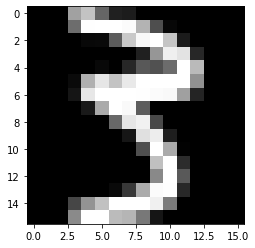

In [103]:
firstdigit=np.reshape(Xall[15,:], (16, 16)) 
plt.imshow(firstdigit, cmap='gray')

In [ ]:
# ci-aprés l'image obtenue suite à la reconstruction, on remarque que l'image a été reconstruite néanmoins  elle est un peu flouté mais on a perdu de l'information en niveau de gris.

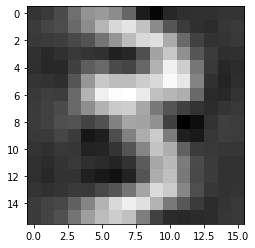

In [104]:
plt.imshow(XhatRa, cmap='gray')